In [1]:
#Imports the important libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [2]:
tickers = ['APN.JO','FSR.JO','IMP.JO','NTC.JO', 'RBP.JO', 'SSW.JO']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, start='2022-7-23')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
mydata.head()

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2022-07-25 00:00:00+02:00,15051.238281,6324.801758,16164.693359,1457.735596,14007.923828,3749.722412
2022-07-26 00:00:00+02:00,15273.944336,6397.297852,16609.722656,1503.779663,14096.414062,3785.480225
2022-07-27 00:00:00+02:00,15140.125000,6347.334473,16669.250000,1528.271118,14173.104492,3757.453857
2022-07-28 00:00:00+02:00,15025.841797,6456.078613,16692.871094,1503.779663,14210.466797,3833.801270
2022-07-29 00:00:00+02:00,14182.878906,6421.790039,17437.421875,1489.084717,14748.288086,3915.947266


In [4]:
mydata.tail()

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2023-02-07 00:00:00+02:00,14734.0,6489.0,20448.0,1417.0,16632.0,4550.0
2023-02-08 00:00:00+02:00,14811.0,6465.0,20080.0,1374.0,16508.0,4576.0
2023-02-09 00:00:00+02:00,14811.0,6495.0,19597.0,1374.0,16337.0,4491.0
2023-02-10 00:00:00+02:00,14737.0,6426.0,19082.0,1375.0,16200.0,4324.0
2023-02-13 00:00:00+02:00,14653.0,6483.0,19441.0,1388.0,16267.0,4373.0


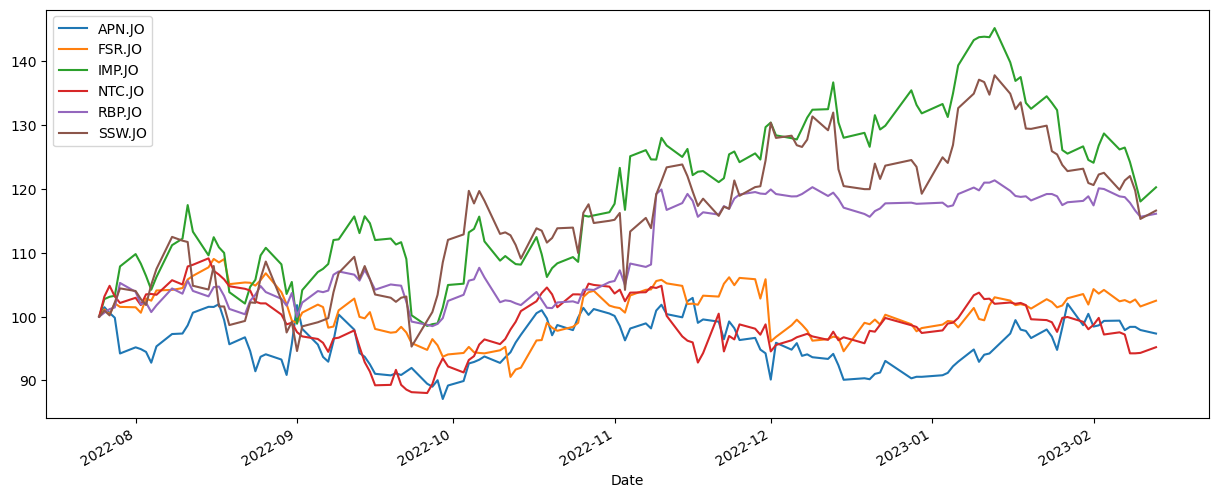

In [5]:
#Normalization to 100
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));

<AxesSubplot:xlabel='Date'>

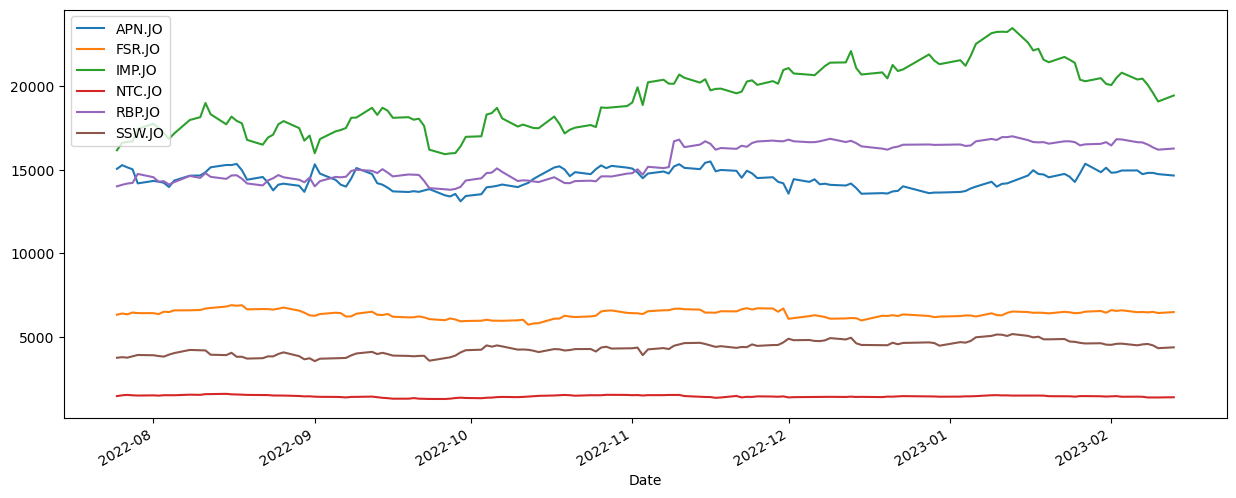

In [6]:
mydata.plot(figsize=(15,6))

In [7]:
mydata.iloc[0]

APN.JO    15051.238281
FSR.JO     6324.801758
IMP.JO    16164.693359
NTC.JO     1457.735596
RBP.JO    14007.923828
SSW.JO     3749.722412
Name: 2022-07-25 00:00:00+02:00, dtype: float64

In [8]:
mydata.iloc[0]

APN.JO    15051.238281
FSR.JO     6324.801758
IMP.JO    16164.693359
NTC.JO     1457.735596
RBP.JO    14007.923828
SSW.JO     3749.722412
Name: 2022-07-25 00:00:00+02:00, dtype: float64

In [9]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2022-07-25 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-26 00:00:00+02:00,0.014797,0.011462,0.027531,0.031586,0.006317,0.009536
2022-07-27 00:00:00+02:00,-0.008761,-0.007810,0.003584,0.016287,0.005440,-0.007404
2022-07-28 00:00:00+02:00,-0.007548,0.017132,0.001417,-0.016026,0.002636,0.020319
2022-07-29 00:00:00+02:00,-0.056101,-0.005311,0.044603,-0.009772,0.037847,0.021427


In [10]:
#Weights number 1
weights = np.array([0.1321, 0.0552,0.1376,0.0632,0.0895,0.1239])

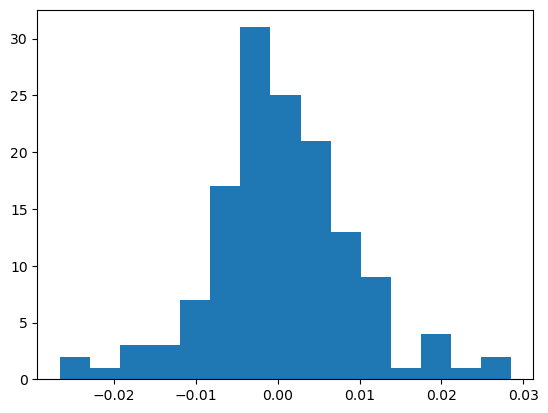

In [11]:
x  = np.dot(returns,weights)
plt.hist(x, bins=15)
plt.show()

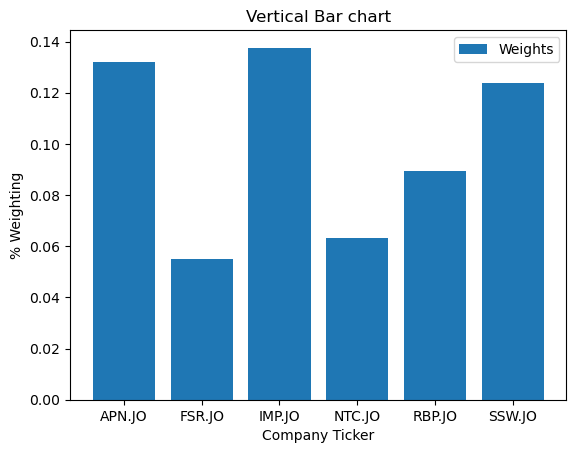

In [12]:
plt.bar(tickers,weights,label="Weights")
plt.legend()
plt.xlabel('Company Ticker')
plt.ylabel('% Weighting')
plt.title('Vertical Bar chart')
plt.show()

annual_returns = returns.mean() * 250
print(str(round(annual_returns,2)*100))

In [13]:
annual_returns = returns.mean() * 250 

In [14]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)*100)
print(pfolio_1+"%")

13.11%
